In [2]:
library(zoo)
library(strucchange)

In [3]:
data = read.csv("data/ts-by-week.csv", header=TRUE )

In [4]:
head(data)

,X,date,trips,stations
,<int>,<chr>,<int>,<int>
1,0,2015-01-05,6259,86
2,1,2015-01-12,6884,86
3,2,2015-01-19,7453,86
4,3,2015-01-26,7478,86
5,4,2015-02-02,6802,85
6,5,2015-02-09,7383,85


In [5]:
data$date <- as.Date(data$date, format = "%Y-%m-%d")
row.names(data) <- data$date
head(data)

,X,date,trips,stations
,<int>,<date>,<int>,<int>
2015-01-05,0,2015-01-05,6259,86
2015-01-12,1,2015-01-12,6884,86
2015-01-19,2,2015-01-19,7453,86
2015-01-26,3,2015-01-26,7478,86
2015-02-02,4,2015-02-02,6802,85
2015-02-09,5,2015-02-09,7383,85


In [6]:
# data_ts <- xts(data$trips, data$date)
## convert to a zoo object, with order given by the `datefield`
data.zoo <- with(data, zoo(trips, order.by = date))
## or to a regular zoo object
data.zoo2 <- with(data, zoo(stations, order.by = date))
# colnames(data_ts) <- c("trips")

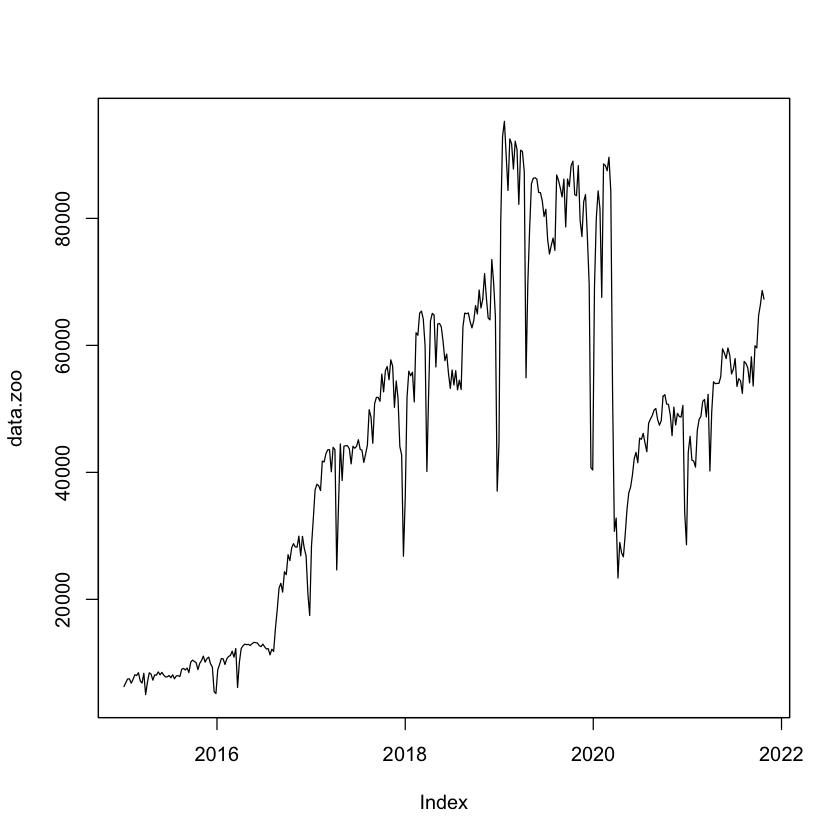

In [7]:
plot(data.zoo)

In [8]:
serie=as.ts(data$trips)

In [9]:
ticks = seq(1, length(data$X), length.out = 20)
labels = format(data$date[ticks], format = "%m / %Y")

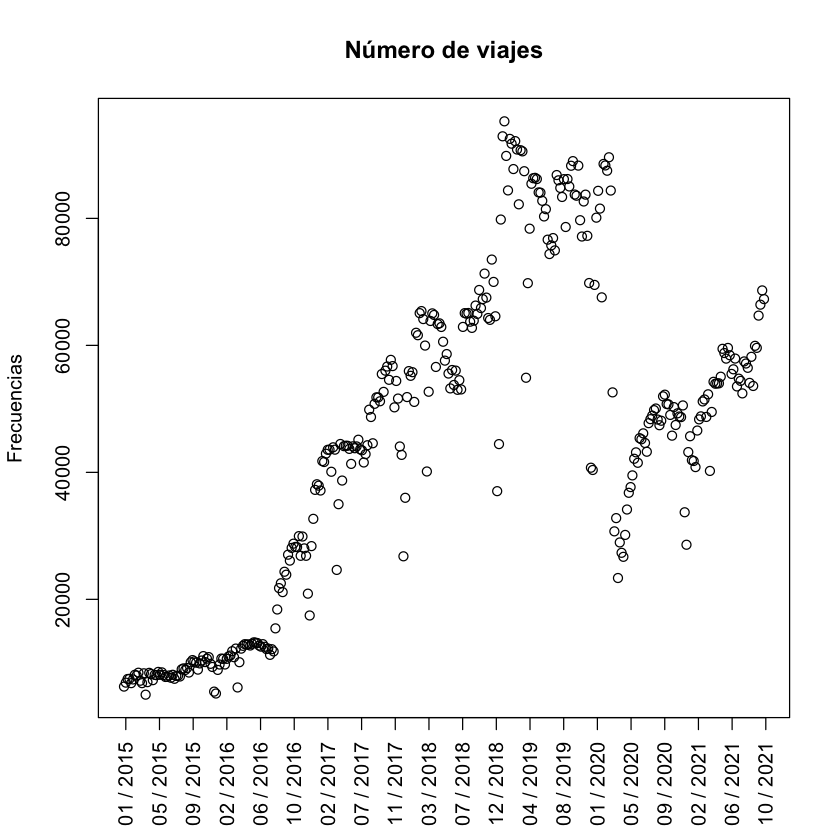

In [10]:
plot(data$X, data$trips, main="Número de viajes", ylab="Frecuencias", xaxt = "n", xlab = "")
axis(1, labels=labels, at = ticks, las=2)


	 Optimal 2-segment partition: 

Call:
breakpoints.Fstats(obj = res2)

Breakpoints at observation number:
271 

Corresponding to breakdates:
0.758427 

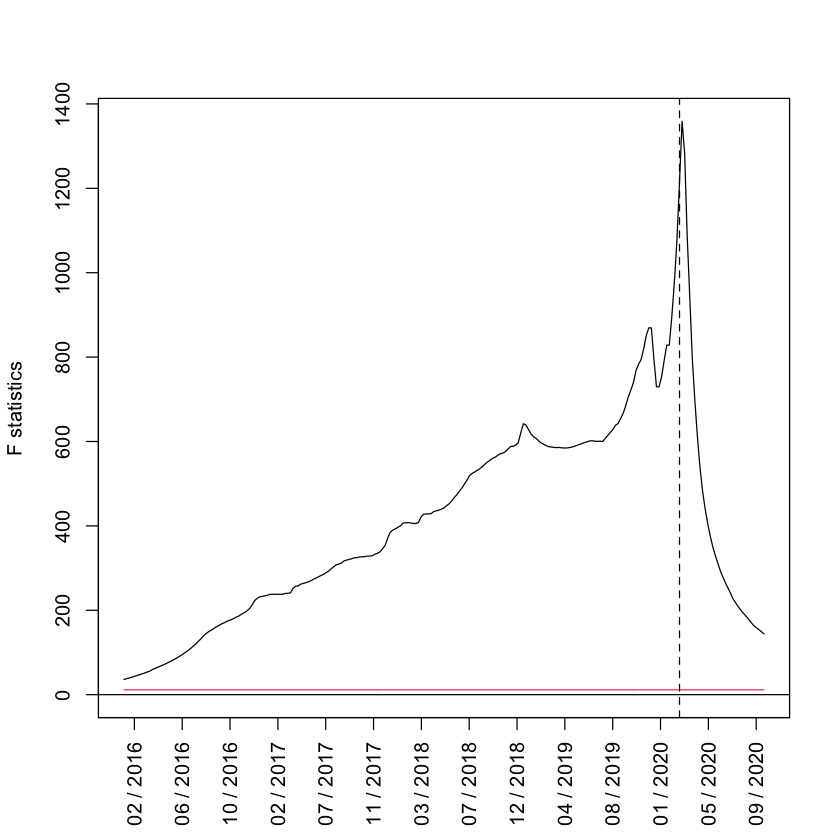

In [11]:
res2=Fstats(trips ~ date + 1, data = data)
plot(res2, xaxt = "n", xlab = "")
axis(1, labels=labels, at = ticks/length(data$X), las=2)
breakpoints(res2)
lines(breakpoints(res2))

In [12]:
sctest(res2, type="supF")


	supF test

data:  res2
sup.F = 1358.7, p-value < 2.2e-16


In [13]:
bp <- breakpoints(res2)

In [14]:
data$date[bp$breakpoint]

[1] "2020-03-09"

In [15]:
fm1 <- lm(trips ~ breakfactor(bp)/date - 1, data = data)

In [16]:
summary(fm1)


Call:
lm(formula = trips ~ breakfactor(bp)/date - 1, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-46783  -4269    467   5072  25152 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
breakfactor(bp)segment1      -8.191e+05  1.614e+04 -50.743  < 2e-16 ***
breakfactor(bp)segment2      -7.583e+05  9.845e+04  -7.702 1.37e-13 ***
breakfactor(bp)segment1:date  4.963e+01  9.281e-01  53.478  < 2e-16 ***
breakfactor(bp)segment2:date  4.330e+01  5.284e+00   8.195 4.70e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8367 on 352 degrees of freedom
Multiple R-squared:  0.974,	Adjusted R-squared:  0.9737 
F-statistic:  3297 on 4 and 352 DF,  p-value: < 2.2e-16


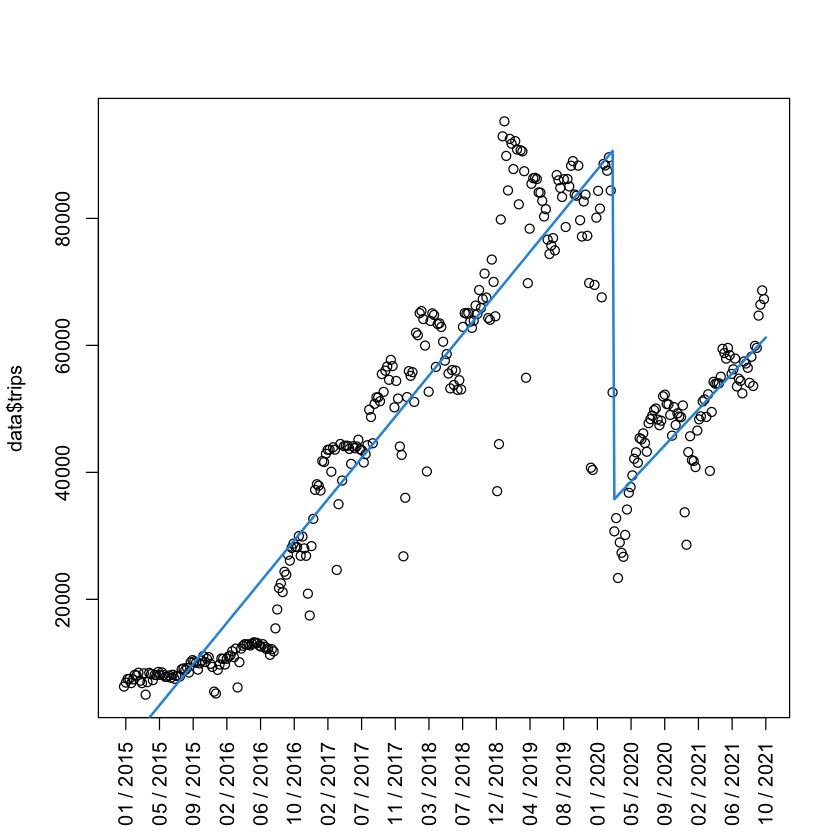

In [17]:
## plot
plot(data$X, data$trips, xaxt = "n", xlab = "")
axis(1, labels=labels, at = ticks, las=2)

lines(fitted(fm1), col = 4, lwd = 2)

## Multiples puntos de quiebre


	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = trips ~ date + 1, data = data)

Breakpoints at observation number:
                          
m = 1                  271
m = 2              209 271
m = 3      86      209 271
m = 4      85  150 209 271
m = 5   53 106 159 212 271

Corresponding to breakdates:
                                                                               
m = 1                                                                          
m = 2                                                         0.587078651685393
m = 3                     0.241573033707865                   0.587078651685393
m = 4                     0.23876404494382  0.421348314606742 0.587078651685393
m = 5   0.148876404494382 0.297752808988764 0.446629213483146 0.595505617977528
                        
m = 1   0.76123595505618
m = 2   0.76123595505618
m = 3   0.76123595505618
m = 4   0.76123595505618
m = 5   0.76123595505618

Fit:
                               

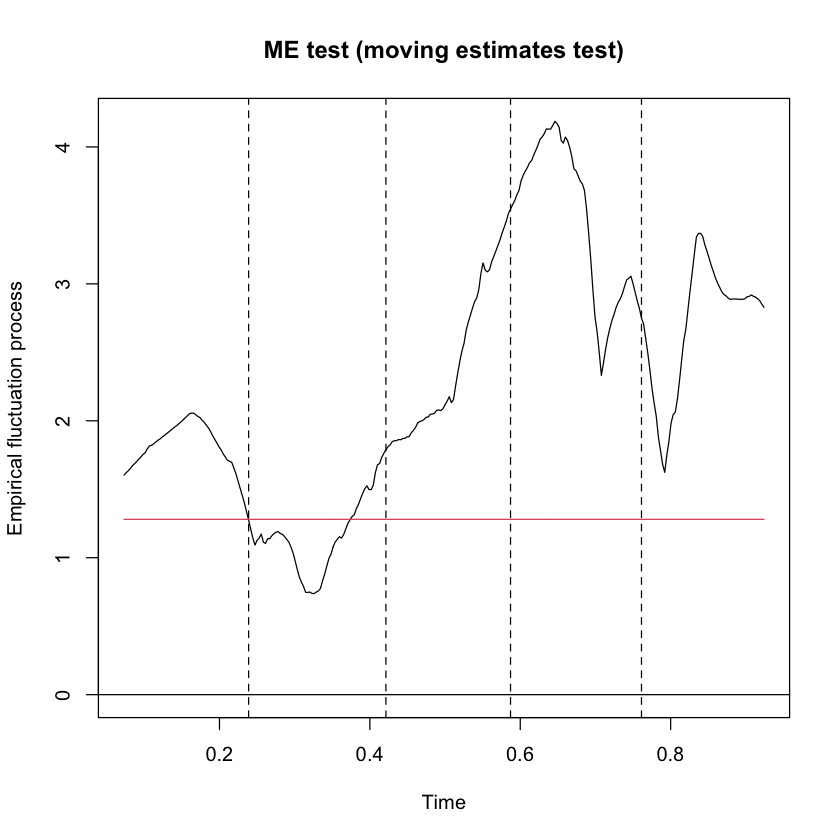


	 Optimal 5-segment partition: 

Call:
breakpoints.breakpointsfull(obj = bp.bikes)

Breakpoints at observation number:
85 150 209 271 

Corresponding to breakdates:
0.238764 0.4213483 0.5870787 0.761236 

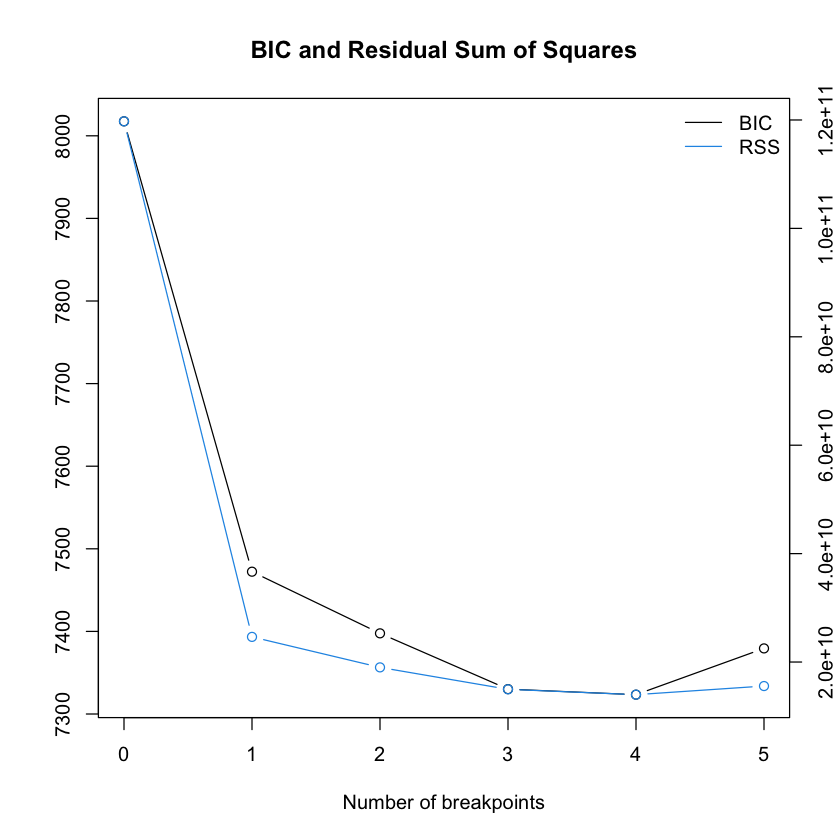

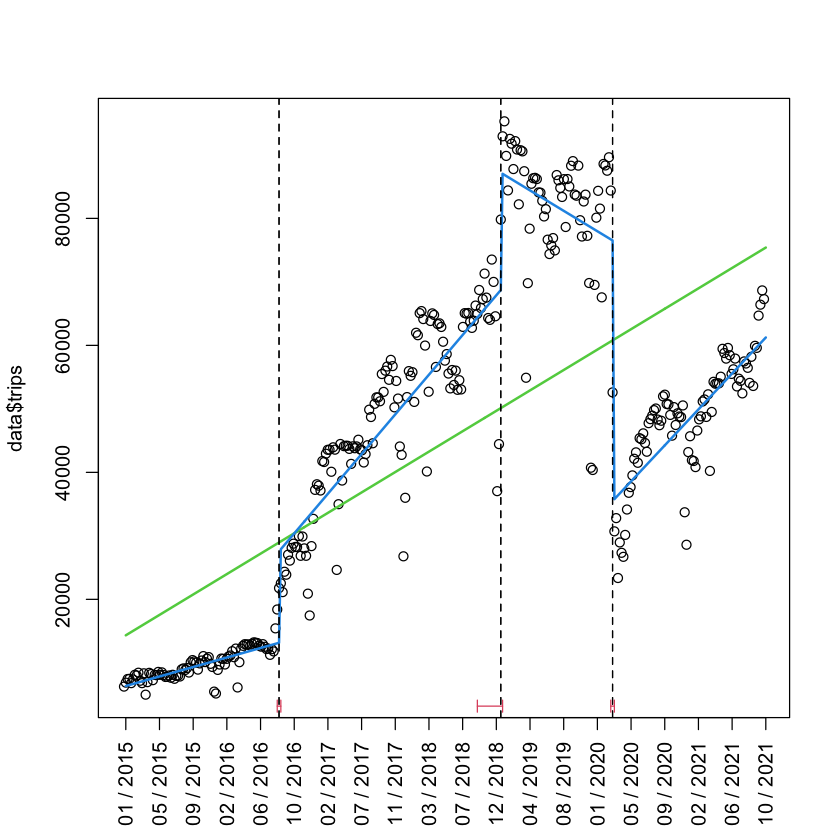

In [18]:
re.bikes <- efp(trips ~ date + 1, data = data, type = "ME")
plot(re.bikes)

## dating
bp.bikes <- breakpoints(trips ~ date + 1, data = data)
summary(bp.bikes)
lines(bp.bikes)

## minimum BIC partition
plot(bp.bikes)
breakpoints(bp.bikes)

bp.bikes2 <- breakpoints(serie ~ data$date + 1, breaks = 3)
fm0 <- lm(trips ~ date + 1, data = data)
fm1 <- lm(trips ~ breakfactor(bp.bikes2)/ date - 1, data = data)

## confidence interval
ci <- confint(bp.bikes2, level = 0.95)

## plot
plot(data$X, data$trips, xaxt = "n", xlab = "")
axis(1, labels=labels, at = ticks, las=2)

lines(fitted(fm0), col = 3, lwd = 2)
lines(fitted(fm1), col = 4, lwd = 2)
lines(bp.bikes2)
lines(ci)

In [19]:
A <- ci$confint
confintDates <- data$date[A]
confintDates[c(1, 4, 7)]
confintDates[c(2, 5, 8)]
confintDates[c(3, 6, 9)]

[1] "2016-08-15" "2016-08-22" "2016-08-29"

[1] "2018-10-01" "2018-12-31" "2019-01-07"

[1] "2020-03-02" "2020-03-09" "2020-03-16"

In [20]:
data$date[bp.bikes2$breakpoints] 
# First  breakpoint Noviembre 2016  Inauguran segunda etapa de MiBici     https://www.informador.mx/Jalisco/Inauguran-segunda-etapa-de-MiBici-20161027-0035.html
# Second breakpoint Octubre 2018    Inauguran tercera etapa de MiBici     https://www.eloccidental.com.mx/local/inauguran-tercera-etapa-de-mibici-2714371.html
# Third  breakpoint Marzo 2020      Cierre de escuelas en Jalisco (COVID) https://www.animalpolitico.com/2020/03/jalisco-suspende-clases-universidades-eventos-masivos-coronavirus/

[1] "2016-08-22" "2018-12-31" "2020-03-09"

In [21]:
summary(fm1)


Call:
lm(formula = trips ~ breakfactor(bp.bikes2)/date - 1, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-37872  -1903    492   3757  16818 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
breakfactor(bp.bikes2)segment1      -1.816e+05  6.812e+04  -2.666 0.008041 ** 
breakfactor(bp.bikes2)segment2      -7.867e+05  4.157e+04 -18.925  < 2e-16 ***
breakfactor(bp.bikes2)segment3       5.271e+05  1.205e+05   4.375  1.6e-05 ***
breakfactor(bp.bikes2)segment4      -7.583e+05  7.717e+04  -9.826  < 2e-16 ***
breakfactor(bp.bikes2)segment1:date  1.143e+01  4.070e+00   2.809 0.005249 ** 
breakfactor(bp.bikes2)segment2:date  4.780e+01  2.379e+00  20.089  < 2e-16 ***
breakfactor(bp.bikes2)segment3:date -2.458e+01  6.649e+00  -3.697 0.000254 ***
breakfactor(bp.bikes2)segment4:date  4.330e+01  4.142e+00  10.455  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6558 on 348 degrees of 

In [22]:
# https://rpubs.com/joser/RegresionSimple

In [28]:
library(ggplot2)
library(scales)

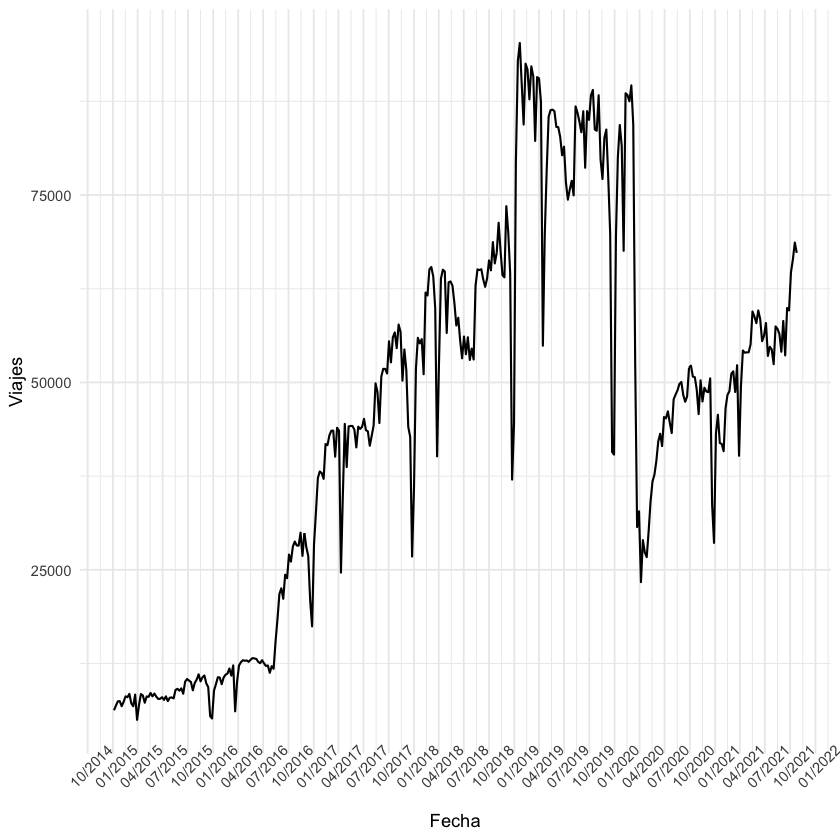

In [134]:
ggplot(data = data, aes(x = date, y = trips)) +
    labs(x="Fecha", y="Viajes") +
    geom_line(size=0.6) +
    scale_x_date(labels = date_format("%m/%Y"), breaks = scales::pretty_breaks(n = 24)) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle=45))
ggsave("serie1.png", width = 16, height = 8, units = "cm")

In [161]:
P <- ggplot(data = data, aes(x = date, y = trips)) +
     labs(x="Fecha", y="Viajes") +
     geom_line(size=0.6) +
     scale_x_date(labels = date_format("%m/%Y"), breaks = scales::pretty_breaks(n = 20)) +
     theme_minimal() +
     theme(axis.text.x = element_text(angle=45))
# ggsave("serie1.png", width = 20, height = 8, units = "cm")

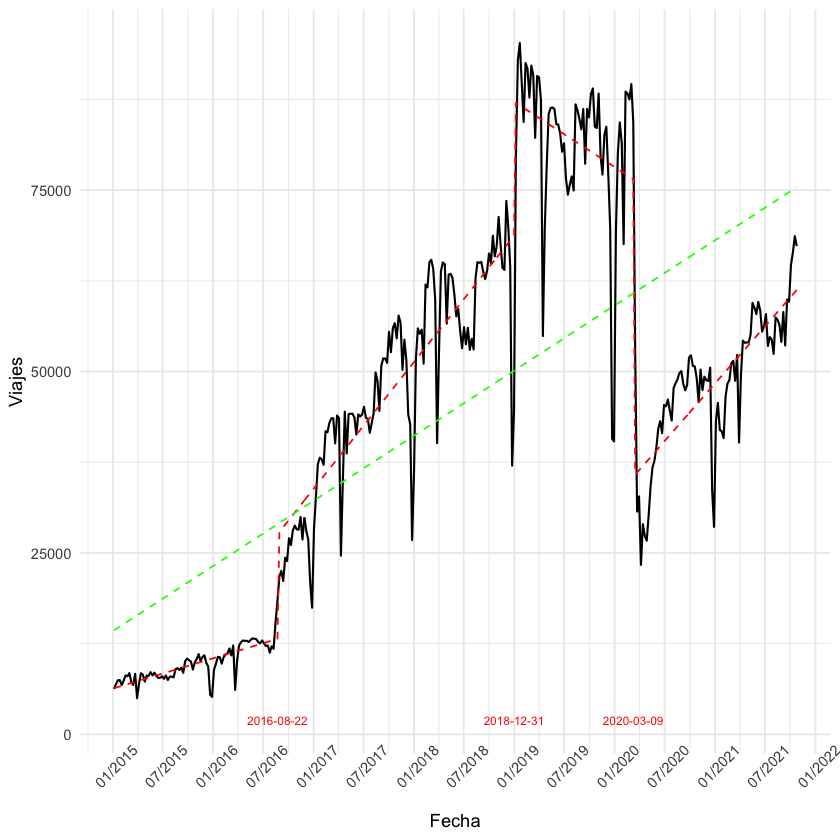

In [162]:
linearModel <- as.data.frame(fitted(fm1))
df <- data.frame(
  line = linearModel$`fitted(fm1)`,
  date = data$date
)

linearModel <- as.data.frame(fitted(fm0))
df2 <- data.frame(
  line = linearModel$`fitted(fm0)`,
  date = data$date
)

P <- P + geom_line(data = df, aes(x = date, y = line), linetype = 2, color = "red") +
    geom_line(data = df2, aes(x = date, y = line), linetype = 2, color = "green")

for (i in 1:3) {
     P = P + annotate(geom = "text", x = data$date[bp.bikes2$breakpoints][i], y = 2000, 
             label = data$date[bp.bikes2$breakpoints][i], color = "red", size = 2.5)
}
P
ggsave("serie_breaks.png", width = 16, height = 8, units = "cm")

In [141]:
ci$confint

,2.5 %,breakpoints,97.5 %
1,85,86,87
2,196,209,210
3,270,271,272
